In [71]:
%pip install opencv-python
%pip install matplotlib

import cv2
import matplotlib.pyplot as plt

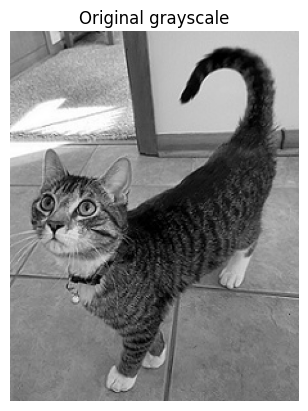

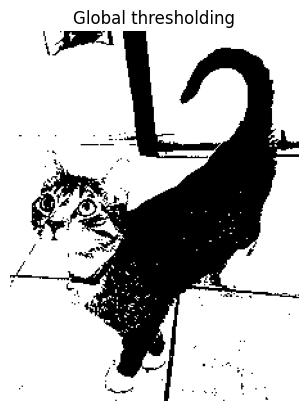

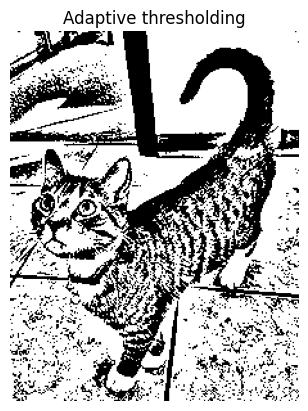

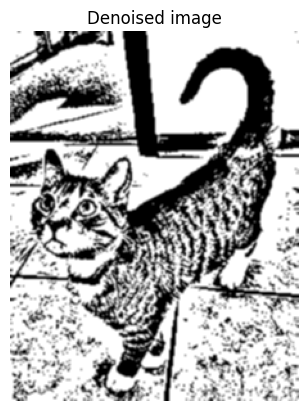

In [72]:
# loading the image as grayscale (for simplicity, it's in the same folder as this file)
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# showing the original image
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# using matplotlib instead of cv2.imshow() so it also works on Google Colab
plt.title("Original grayscale")
plt.axis("off")
plt.imshow(original_rgb)
plt.show()

# making the image black and white using global thresholding
im_global = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
im_global_rgb = cv2.cvtColor(im_global, cv2.COLOR_BGR2RGB)
plt.title("Global thresholding")
plt.axis("off")
plt.imshow(im_global_rgb)
plt.show()

# using adaptive thresholding with some manual tuning for a more detailed result
im_adaptive = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51,6)
im_adaptive_rgb = cv2.cvtColor(im_adaptive, cv2.COLOR_BGR2RGB)
plt.title("Adaptive thresholding")
plt.axis("off")
plt.imshow(im_adaptive_rgb)
plt.show()

# removing noise using Gaussian blur
denoised_img = cv2.GaussianBlur(im_adaptive, (3, 3), 0)
denoised_img_rgb = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB)
plt.title("Denoised image")
plt.axis("off")
plt.imshow(denoised_img_rgb)
plt.show()


In [73]:
%pip install keras

from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
# cropping the images to the 224x224 format suitable for MobileNetV2
center_n = im_adaptive_rgb.shape
center_d = denoised_img_rgb.shape

w = 224
h = 224

x_n = center_n[1]/2 - w / 2
y_n = center_n[0]/2 - h / 2

x_d = center_d[1]/2 - w / 2
y_d = center_d[0]/2 - h / 2

cropped_no_denoising = im_adaptive_rgb[int(y_n):int(y_n+h), int(x_n):int(x_n+w)]
cropped_no_denoising_rgb = cv2.cvtColor(cropped_no_denoising, cv2.COLOR_BGR2RGB)

cropped_denoised = denoised_img_rgb[int(y_d):int(y_d+h), int(x_d):int(x_d+w)]
cropped_denoised_rgb = cv2.cvtColor(cropped_denoised, cv2.COLOR_BGR2RGB)

plt.title("Cropped image without denosing")
plt.axis("off")
plt.imshow(cropped_no_denoising_rgb)
plt.show()

plt.title("Cropped denoised image")
plt.axis("off")
plt.imshow(cropped_denoised_rgb)
plt.show()


In [70]:
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

model = MobileNetV2(weights='imagenet')

data_noise = preprocess_input(cropped_no_denoising_rgb.reshape(1,224,224,3))
predictions_noise = model.predict(data_noise)

data_denoised = preprocess_input(cropped_denoised_rgb.reshape(1,224,224,3))
predictions_denoised = model.predict(data_denoised)

print('Predictions without denoising:')
for i, (_, desc, score) in enumerate(decode_predictions(predictions_noise)[0]):
    print(f'{i + 1}. {desc} : {score * 100 : .2f}%')

print('\nPredictions with denoising:')
for i, (_, desc, score) in enumerate(decode_predictions(predictions_denoised)[0]):
    print(f'{i + 1}. {desc} : {score * 100 : .2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predictions without denoising:
1. drumstick :  5.13%
2. chain :  5.01%
3. maze :  3.93%
4. crossword_puzzle :  3.87%
5. pajama :  3.66%

Predictions with denoising:
1. tabby :  25.96%
2. Egyptian_cat :  19.56%
3. lynx :  15.14%
4. tiger_cat :  2.00%
5. Kerry_blue_terrier :  1.43%


**Coclusion**

We can see that MobileNetV2 returned totally random results for the original black and white image.
Its predictions for the de-noised image are much better - the top prediction is correct, and all the top 4 choices are cats.